# Wavelength Loss dependence using BraggExact

Here for the N1 configuration from Bird.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [11]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6]
mats = ['air', 'glass', 'air']
maxhs = [1, 1, 1]

# Four Layer Study: Glass outside Air (Outside Cladding)

In [17]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=maxhs, wl=wl, mats=mats, ns=ns)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.31250879203911-4.730829732486265e-05j) . Residual of determinant:  1.2911804657088277e-12 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.21634797123505-4.096102353092705e-05j) . Residual of determinant:  2.739634267989146e-12 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.12046879146132-3.612778781002664e-05j) . Residual of determinant:  1.966315404233745e-12 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.02486823775574-3.2385677667345723e-05j) . Residual of determinant:  3.659720658296745e-12 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.92954379640075-2.945282912831079e-05j) . Residual of determinant:  3.079062881300441e-12 


     ------------

scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
scaling guess: 37
scaling guess: 38
scaling guess: 39
scaling guess: 40
scaling guess: 41
scaling guess: 42
scaling guess: 43
scaling guess: 44
scaling guess: 45
scaling guess: 46
scaling guess: 47
scaling guess: 48
Scaled beta:  (63.76808225584095-0.007985414829860473j) . Residual of determinant:  1.2212590612639644e-14 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.67549138400158-0.002645773360626431j) . Residual of 

scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (60.87091241679242-3.090845250314091e-05j) . Residual of determinant:  6.629517753700286e-13 


     --------------------  76/301: wavelength: 1.55e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.792257904824126-3.262303657646054e-05j) . Residual of determinant:  2.995197890690353e-13 


     --------------------  77/301: wavelength: 1.552e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.71380388857996-3.467680658337771e-05j) . Residual of determinant:  2.322665039748357e-12 


     --------------------  78/301: wavelength: 1.5539999999999999e-06  --------------------     

Scaled beta:  (60.635549190128785-3.713441668279488e-05j) . Residual of determinant:  5.912378193186002e-14 


     --------------------  79/301: wavelength: 1.556e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (60.557492557988645-4.0079777391609826e-05j) . Residual of determinant:  

Scaled beta:  (58.235793717401805-7.878536869662125e-05j) . Residual of determinant:  4.102740945904166e-14 


     --------------------  111/301: wavelength: 1.62e-06  --------------------     

scaling guess: 1
Scaled beta:  (58.16375528946697-7.015924068199082e-05j) . Residual of determinant:  1.4795713173962558e-12 


     --------------------  112/301: wavelength: 1.6219999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (58.09190139858141-6.31940987311079e-05j) . Residual of determinant:  2.9497010246574146e-13 


     --------------------  113/301: wavelength: 1.6239999999999998e-06  --------------------     

Scaled beta:  (58.02023005243069-5.7505724858824974e-05j) . Residual of determinant:  5.057968751557752e-13 


     --------------------  114/301: wavelength: 1.626e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (57.948739559037065-5.2816347518695404e-05j) . Residual of determinant: 

scaling guess: 1
Scaled beta:  (55.5530662653483-9.403501218959949e-05j) . Residual of determinant:  5.359002681523934e-13 


     --------------------  150/301: wavelength: 1.6979999999999999e-06  --------------------     

Scaled beta:  (55.48746991885042-0.00010673880918956081j) . Residual of determinant:  4.3169820475417294e-14 


     --------------------  151/301: wavelength: 1.6999999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (55.42201577154239-0.00012258884830000243j) . Residual of determinant:  3.0207388714415367e-13 


     --------------------  152/301: wavelength: 1.702e-06  --------------------     

scaling guess: 1
Scaled beta:  (55.356700265164825-0.00014267654215305132j) . Residual of determinant:  2.756541248291876e-14 


     --------------------  153/301: wavelength: 1.704e-06  --------------------     

Scaled beta:  (55.291518757834545-0.0001686070839

Scaled beta:  (53.532101227164425-8.094473535228491e-05j) . Residual of determinant:  1.884182671410511e-13 


     --------------------  182/301: wavelength: 1.7619999999999998e-06  --------------------     

Scaled beta:  (53.471208534239025-7.468285796853246e-05j) . Residual of determinant:  8.168123855968111e-13 


     --------------------  183/301: wavelength: 1.764e-06  --------------------     

Scaled beta:  (53.41045785753962-6.937346008551277e-05j) . Residual of determinant:  3.862556045908651e-13 


     --------------------  184/301: wavelength: 1.766e-06  --------------------     

Scaled beta:  (53.349848108738136-6.48460281341129e-05j) . Residual of determinant:  2.392610808441523e-13 


     --------------------  185/301: wavelength: 1.7679999999999998e-06  --------------------     

Scaled beta:  (53.28937830898803-6.096765589105155e-05j) . Residual of determinant:  5.99334098251613e-14 


     --------------------  186/301: wavelength: 1.77e-06  -------------------- 

Scaled beta:  (51.14450079342206-9.353992206865832e-05j) . Residual of determinant:  2.926426671169204e-13 


     --------------------  223/301: wavelength: 1.8439999999999998e-06  --------------------     

Scaled beta:  (51.08888727171371-0.0001020128657766514j) . Residual of determinant:  2.580487961207347e-13 


     --------------------  224/301: wavelength: 1.8459999999999998e-06  --------------------     

Scaled beta:  (51.03338806828296-0.00011195704054289746j) . Residual of determinant:  1.0872381105876988e-13 


     --------------------  225/301: wavelength: 1.848e-06  --------------------     

Scaled beta:  (50.97800174722746-0.00012371418896387924j) . Residual of determinant:  5.736164571228605e-13 


     --------------------  226/301: wavelength: 1.8499999999999999e-06  --------------------     

Scaled beta:  (50.922726626374036-0.0001377314525804134j) . Residual of determinant:  1.2869654092172726e-13 


     --------------------  227/301: wavelength: 1.851999999999

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (49.5315941640034-0.00034739639409209525j) . Residual of determinant:  5.03918470299555e-13 


     --------------------  253/301: wavelength: 1.904e-06  --------------------     

Scaled beta:  (49.47931961443534-0.0002961292958155475j) . Residual of determinant:  4.0983997668135414e-13 


     --------------------  254/301: wavelength: 1.9059999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (49.427178116261366-0.0002559614608689345j) . Residual of determinant:  7.86795133681037e-14 


     --------------------  255/301: wavelength: 1.9079999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (49.37516453133957-0.00022395441271575315j) . Residual of determinant:  1.458856989120485e-13 


     --------------------  256/301: wavelength: 1.91e-06  --------------------     

Scaled beta:  (49.323274896674214-0.00019807158568494813j) . Residual of determinant:  4

scaling guess: 1
Scaled beta:  (47.5273498852445-5.623175751453855e-05j) . Residual of determinant:  6.061162550878325e-14 


     --------------------  293/301: wavelength: 1.984e-06  --------------------     

Scaled beta:  (47.47933357131267-5.710464416770125e-05j) . Residual of determinant:  4.0962361962780326e-13 


     --------------------  294/301: wavelength: 1.9859999999999997e-06  --------------------     

Scaled beta:  (47.43141335598164-5.811895052744584e-05j) . Residual of determinant:  4.708962109654134e-13 


     --------------------  295/301: wavelength: 1.988e-06  --------------------     

Scaled beta:  (47.38358887405309-5.928278014579328e-05j) . Residual of determinant:  1.393229639448765e-13 


     --------------------  296/301: wavelength: 1.99e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (47.33585975732493-6.060576696940998e-05j) . Residual of determinant:  5.995624996691604e-13 


     --------------------  297/301: wavelen

In [18]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

<IPython.core.display.Javascript object>


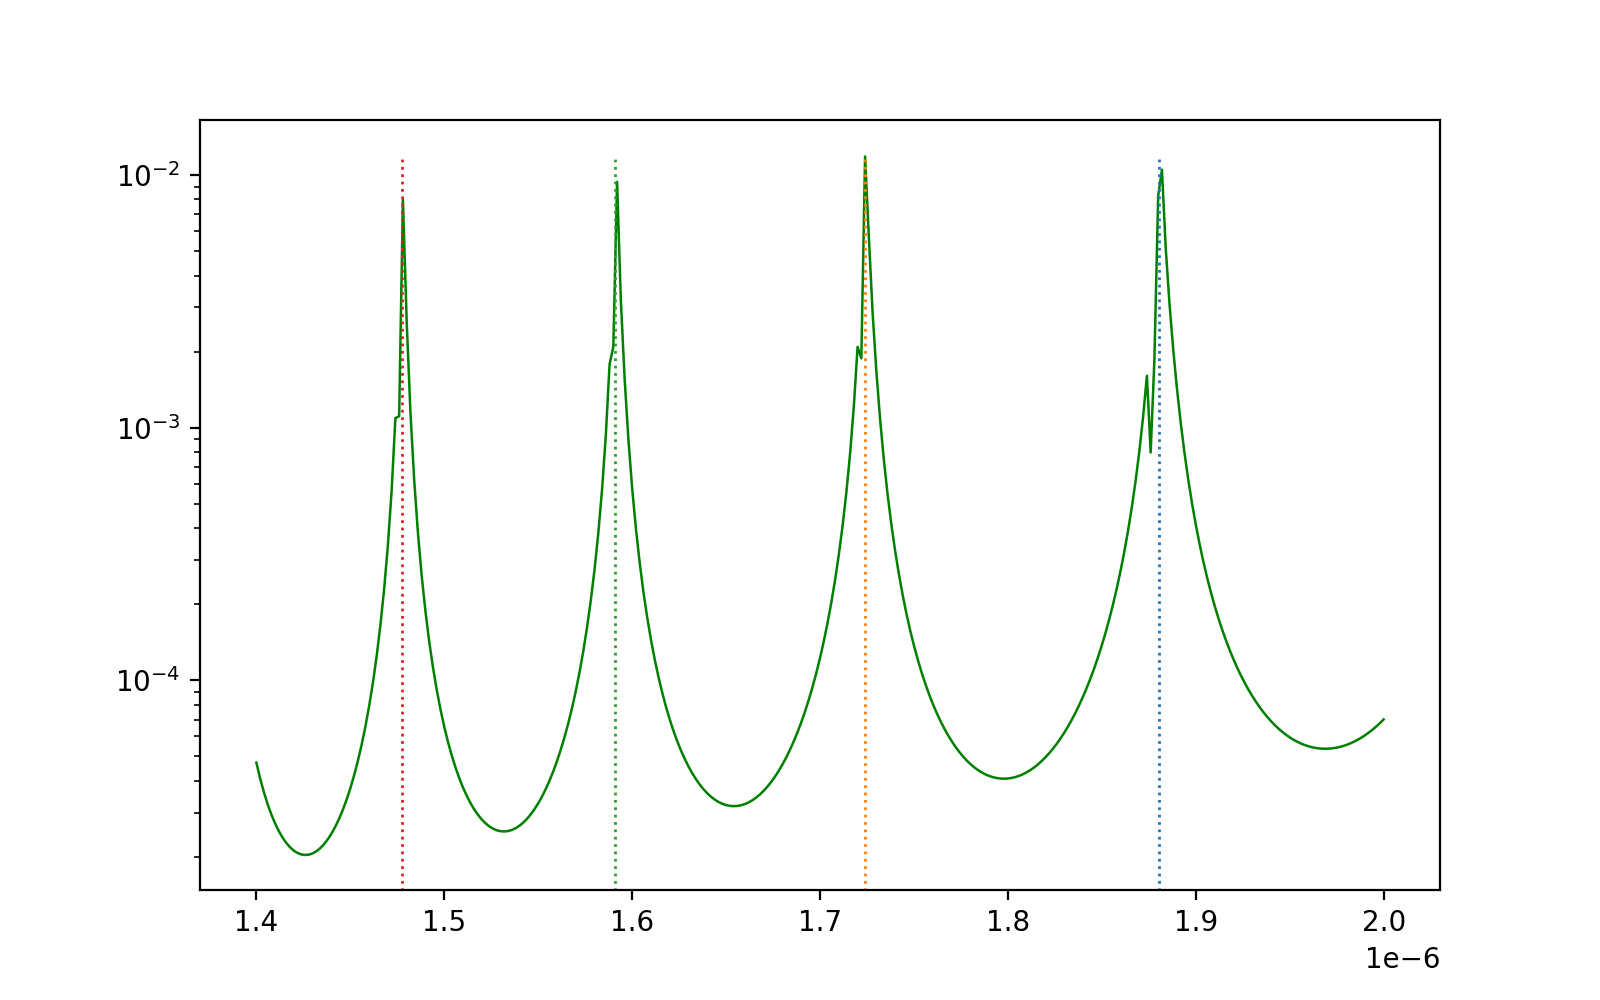

In [21]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in ls:
    plt.plot([l,l], [0, .012],  linewidth=1, linestyle=':')

## Bad wavelengths

In [7]:
ls
np.where(abs(wls-1.88e-6)<(wls[1]-wls[0]))

(array([240]),)

In [8]:
wls[240]

1.8799999999999998e-06

In [9]:
A = BraggExact(ts=ts, ns=ns, maxhs=[.1 ,.02, .04, .02], wl=wls[240])


In [10]:
k_low = A.ks[0] * A.scale


<IPython.core.display.Javascript object>


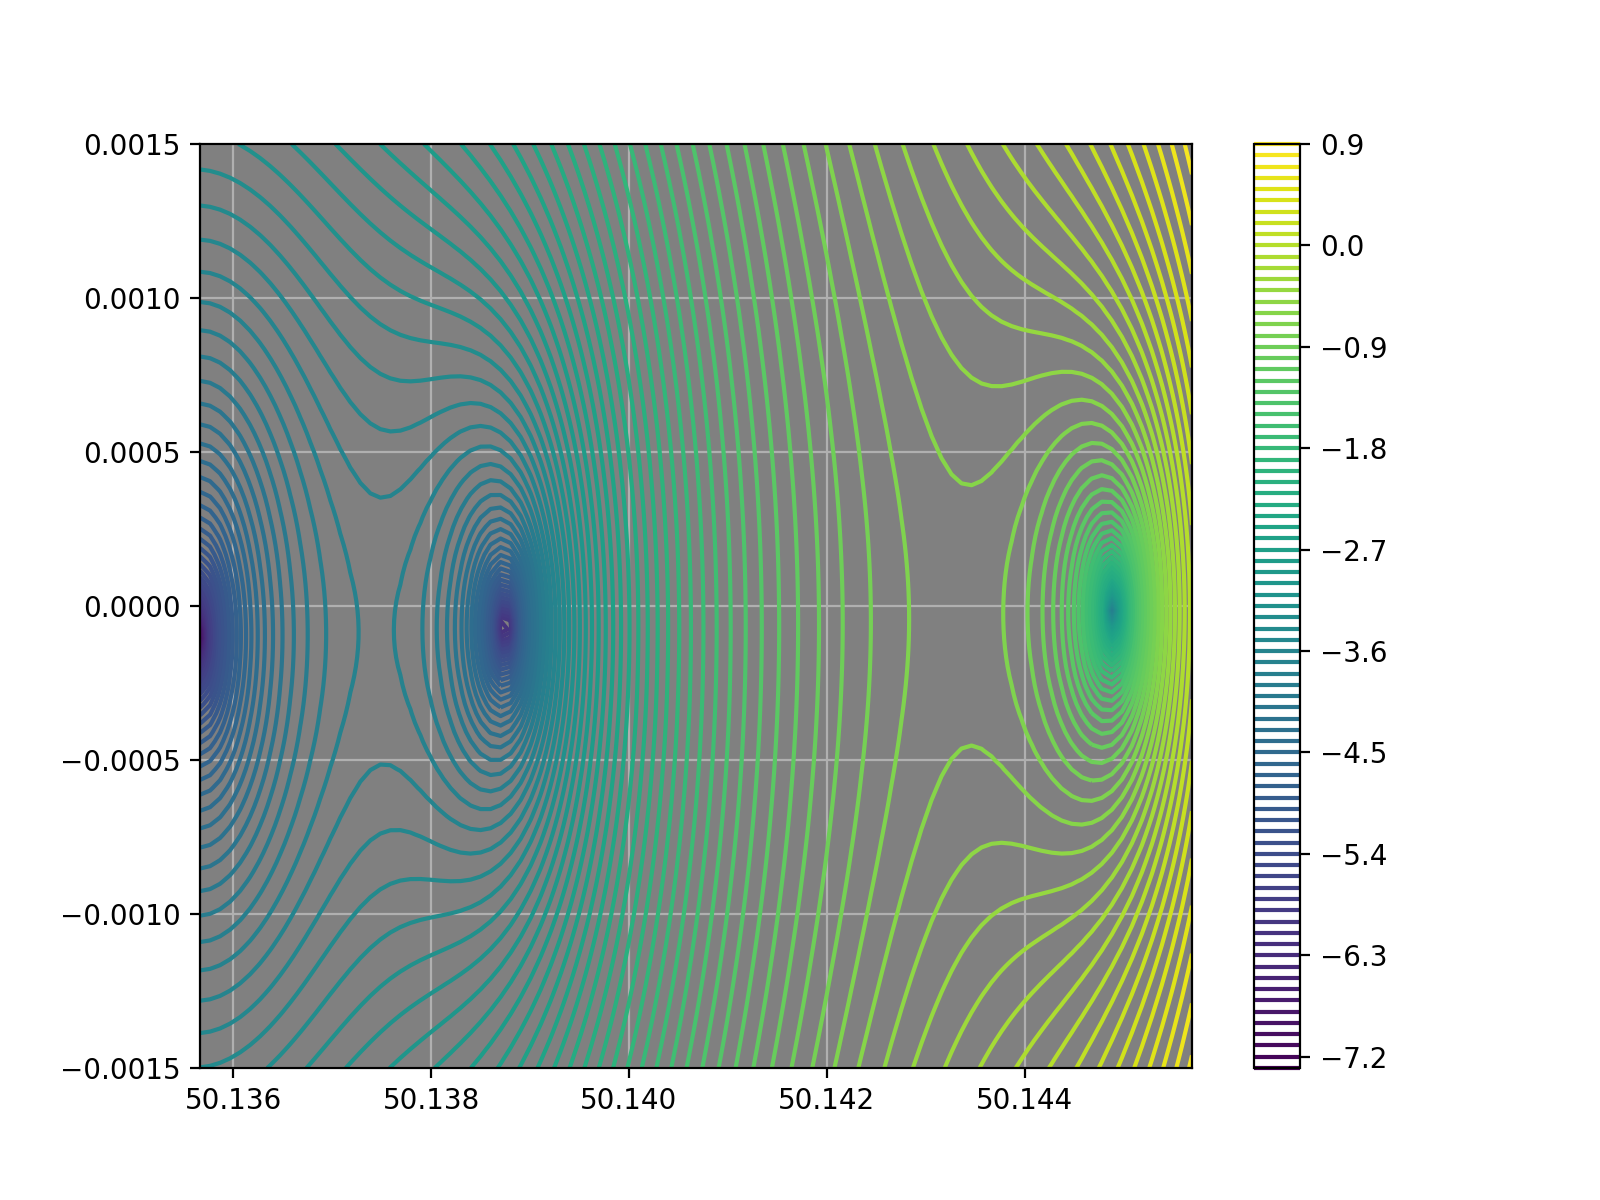

In [11]:
plotlogf(A.determinant, .9998*k_low, k_low, -.0015,.0015, nu, outer,
         iref=100, rref=100, levels=100, figsize=(8,6))

In [12]:
guess = np.array(50.1448)
imag = 0
x0 = np.array(guess + imag*1j)

beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
beta

(50.14490069634236-1.678115760812955e-05j)

In [13]:
betas1[240] = beta

<IPython.core.display.Javascript object>


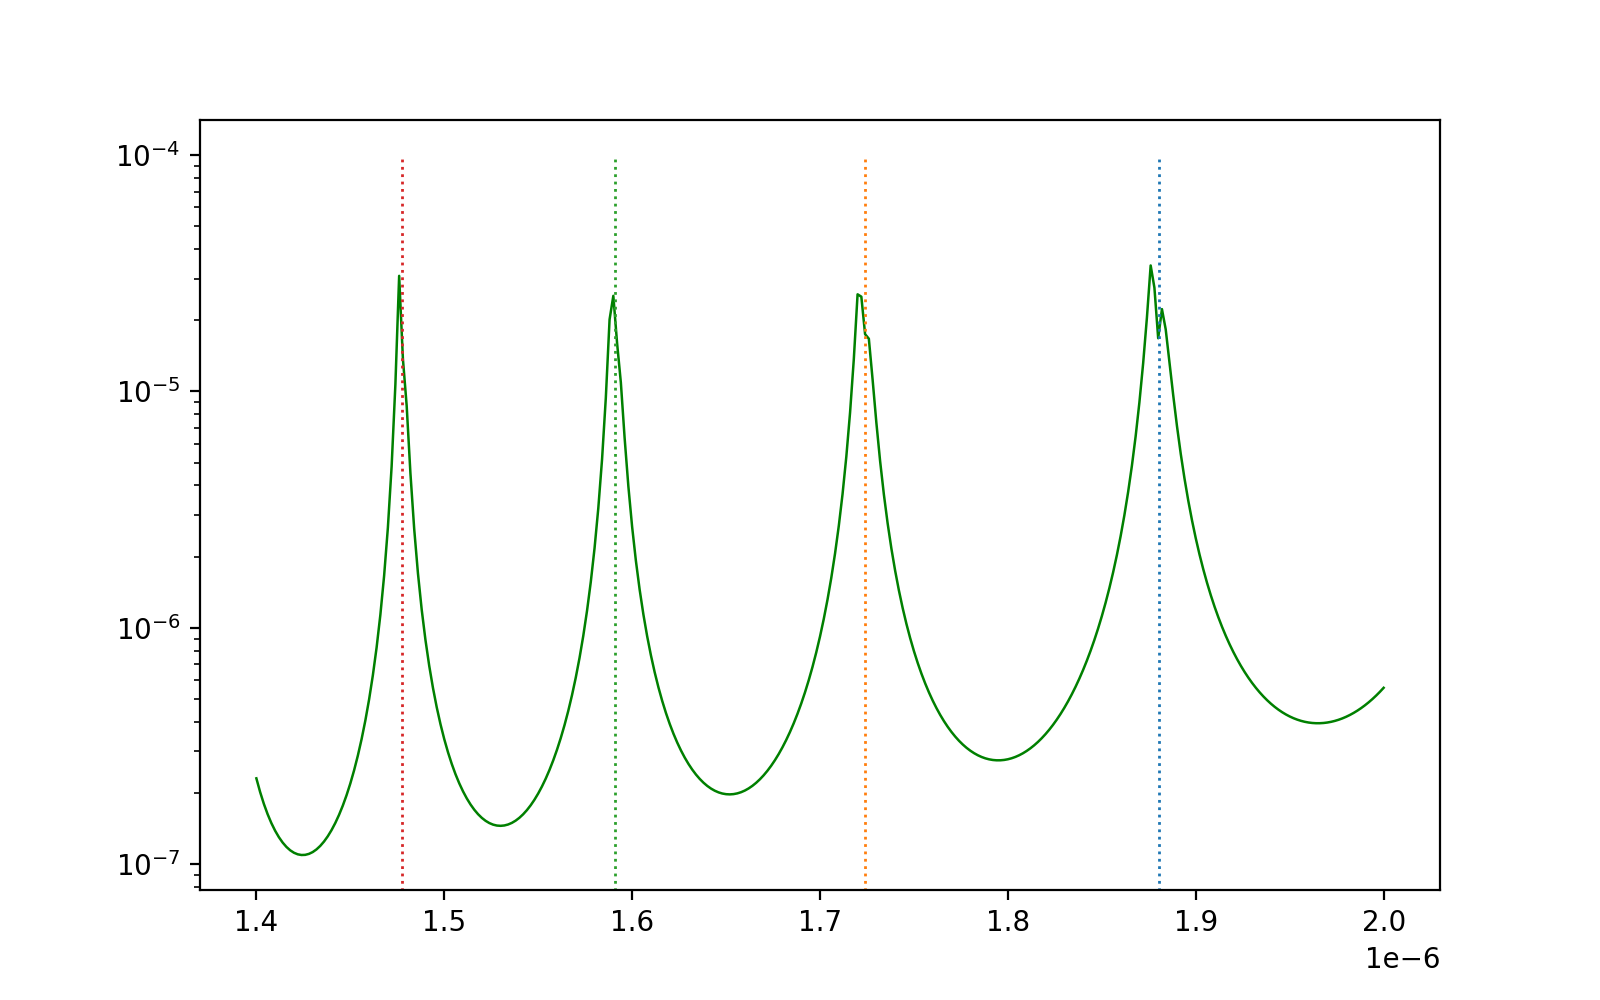

In [14]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, linestyle=':')

# Using Sellmeier

In [ ]:
betas2=np.zeros_like(betas1)
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=[1 ,1, 1, 1], wl=wl)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

In [ ]:
ls_sell=np.load('ls_sell.npy')

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9, label='no sellmeier')
plt.plot(wls, -betas2.imag, color='red', linewidth=.9, label='sellmeier')
plt.yscale('log')
plt.legend()
for l in ls_sell:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='r',linestyle=':')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='g',linestyle=':')
